<font size=5>DSCI-552 Homework6



#### Name: Boyu Shen
#### Github username: boyushen0701
#### USC ID: 3547352504

In [78]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

1. Tree-Based Methods
<br>
<br>(a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a 
training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which 
one is the class column. All attributes are numeric.

In [2]:
training_set=pd.read_csv('../data/aps_failure_training_set.csv',skiprows=20)
training_set.replace('na',np.nan,inplace=True)
training_set.replace('neg',0,inplace=True) # 0 represents negative and 1 represents positive
training_set.replace('pos',1,inplace=True)
training_set #take a look at the training data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,NaN,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,0,2286,NaN,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,0,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,0,80292,NaN,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [3]:
test_set=pd.read_csv('../data/aps_failure_test_set.csv',skiprows=20)
test_set.replace('na',np.nan,inplace=True)
test_set.replace('neg',0,inplace=True) # 0 represents negative and 1 represents positive
test_set.replace('pos',1,inplace=True)
test_set #take a look at the test data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,0,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,NaN,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,0,1814,NaN,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,81852,NaN,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,0,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,0,79636,NaN,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,0,110,NaN,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


(b) Data Preparation
<br>This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea. 
<br>
<br>i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it 
to this data in the next steps.

Data imputation techniques:
<br>1.Impute the missing value with a feature value from another randomly selected observation.
<br>2.Impute the missing value with a statistics such as mean, median or mode value of the column.
<br>3.Impute the missing value with a value estimated by another predictive model.
<br>
<br>Here we use mean statistics in technique 2 to impute missing values.

In [4]:
whole_set=pd.concat([training_set,test_set],axis=0)

In [7]:
from sklearn.impute import SimpleImputer

columns=whole_set.columns
Imp = SimpleImputer(missing_values=np.nan, strategy='mean')
complete_set=pd.DataFrame(Imp.fit_transform(whole_set),columns=columns)
complete_set['class']=complete_set['class'].astype(int)
complete_set

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698.0,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058.0,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040.0,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12.0,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874.0,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,0,81852.0,0.72556,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,0,18.0,0.00000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,0,79636.0,0.72556,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,0,110.0,0.72556,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [8]:
X_train=complete_set.iloc[:60000,1:]
Y_train=complete_set.iloc[:60000,0]
X_test=complete_set.iloc[60000:,1:]
Y_test=complete_set.iloc[60000:,0]

In [9]:
sum(Y_train),sum(Y_test)

(1000, 375)

ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean.

In [8]:
cvs=complete_set.std()/complete_set.mean()
CVs=pd.DataFrame(cvs[1:], columns=["CV"]) # remove the dependent attribute
CVs

,CV
aa_000,4.328608
ab_000,2.178273
ac_000,2.167653
ad_000,206.721500
ae_000,22.293670
...,...
ee_007,4.885098
ee_008,3.335037
ee_009,5.753933
ef_000,47.919544


iii. Plot a correlation matrix for your features using pandas or any other tool.

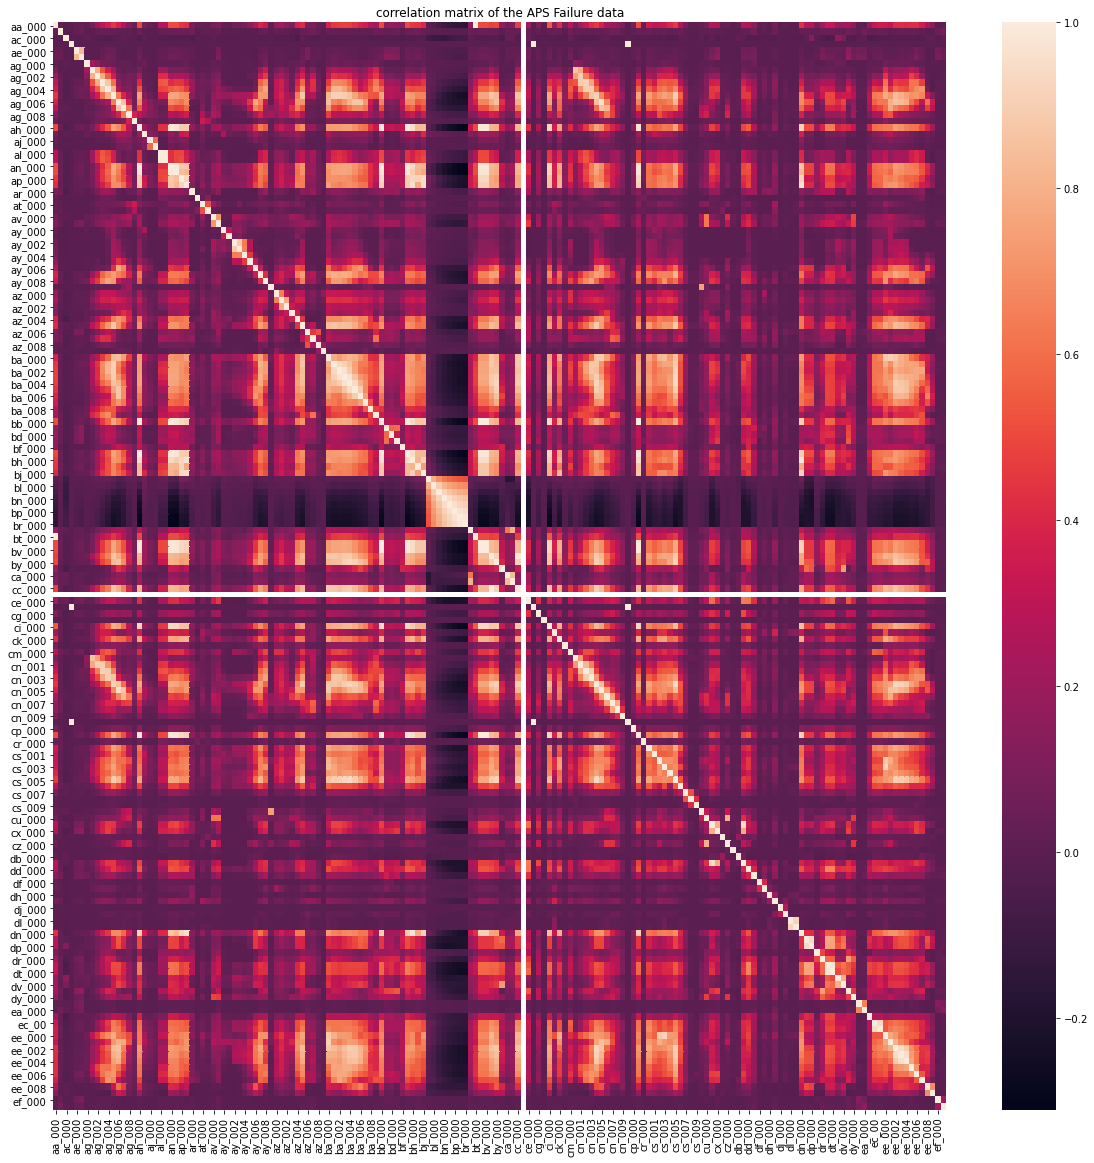

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

cor_matrix = complete_set.iloc[:,1:].corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor_matrix)
plt.title('correlation matrix of the APS Failure data')
plt.show()

iv. Pick ⌊√170⌋ features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw 
conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the 
following questions. We picked them only for visualization.

In [10]:
CVsort=CVs.sort_values('CV',ascending=False)
CVsort

,CV
cf_000,207.270274
co_000,206.876129
ad_000,206.721500
cs_009,192.522611
dj_000,122.128153
...,...
bo_000,0.462899
bp_000,0.426905
bq_000,0.400264
br_000,0.383867


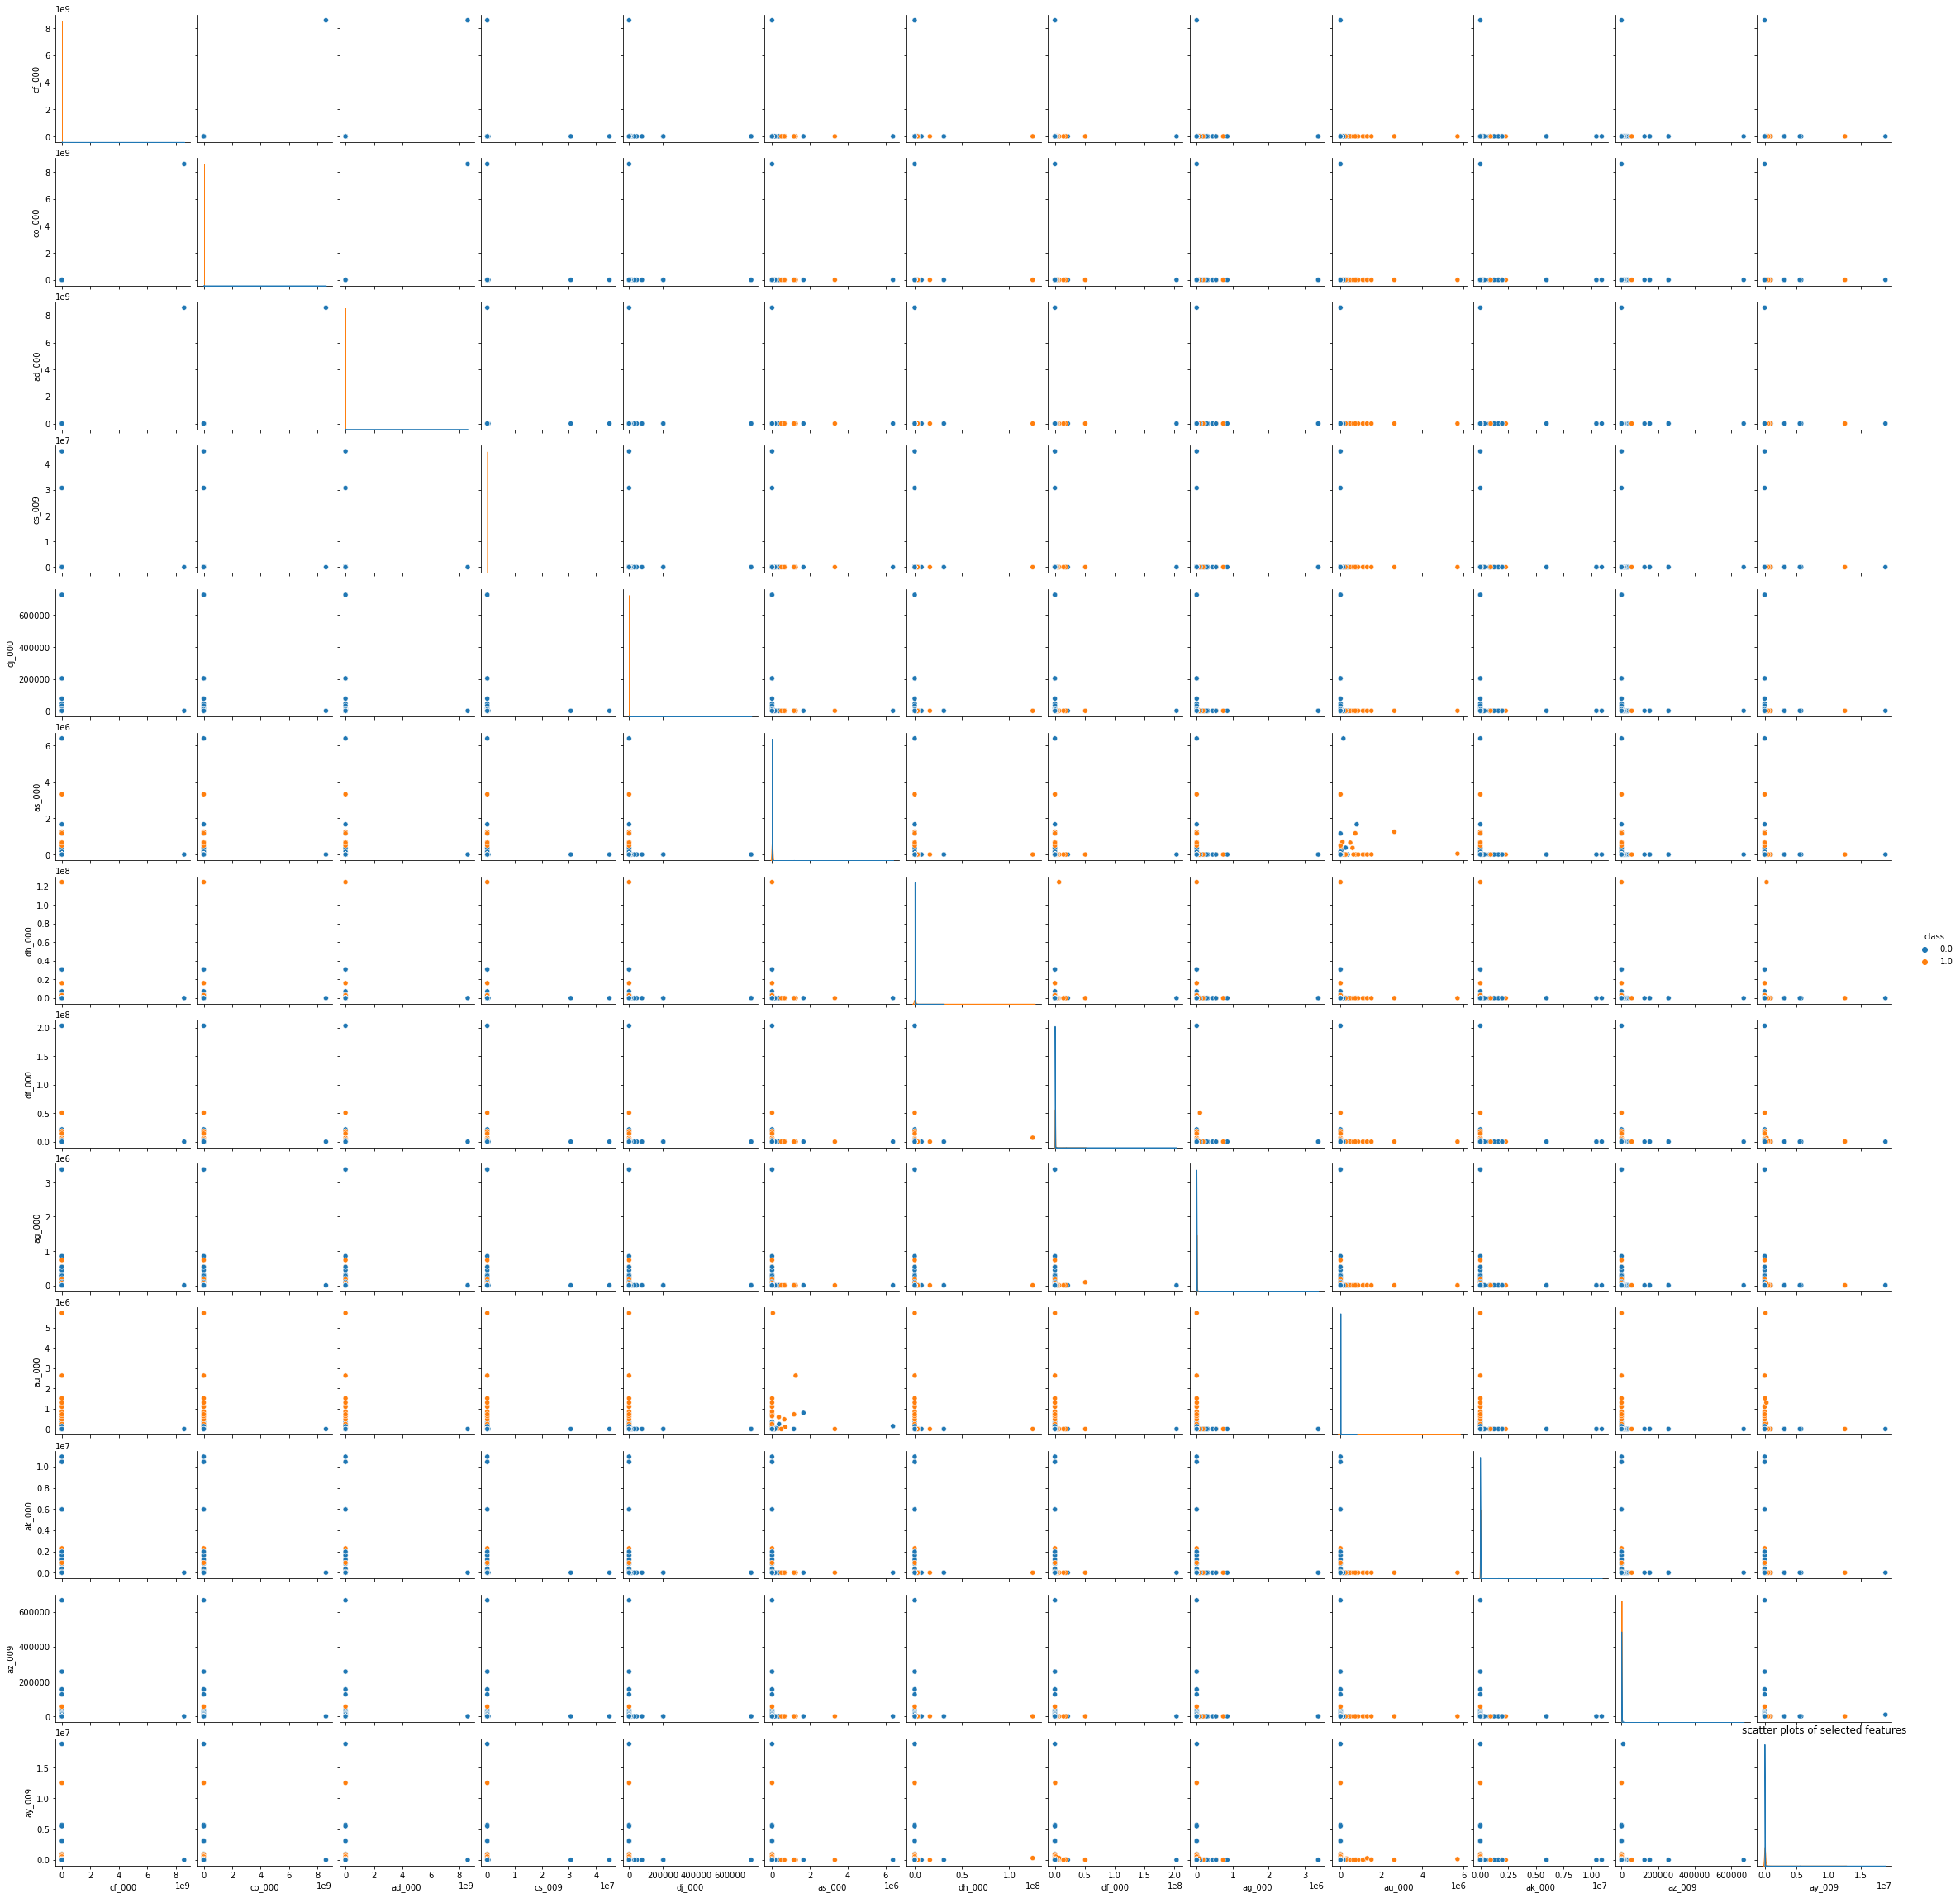

In [11]:
import math

l=math.floor(170**0.5)
selected_features=CVsort.index[:l].tolist()
sns.pairplot(complete_set,vars=selected_features,hue='class')
plt.title('scatter plots of selected features')
plt.show()

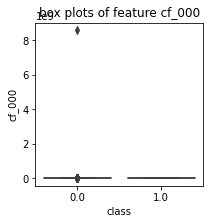

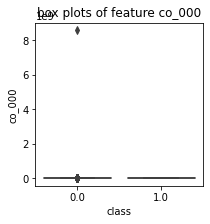

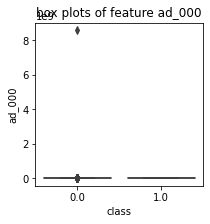

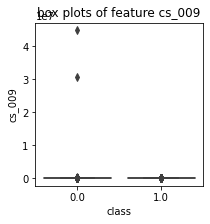

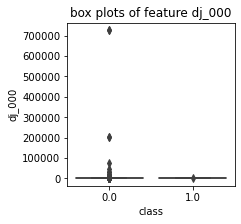

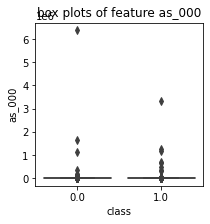

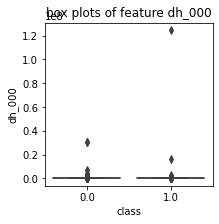

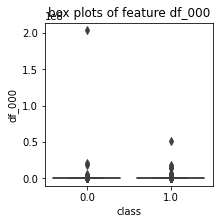

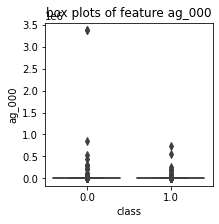

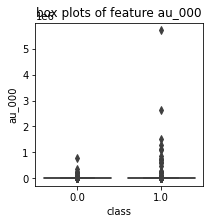

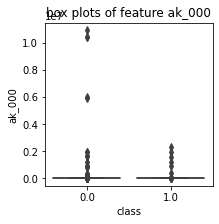

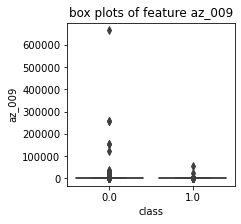

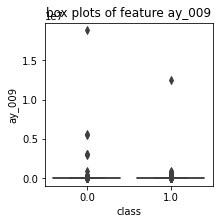

In [29]:
for feature in selected_features:
    plt.figure(figsize=(3,3))
    sns.boxplot(data=complete_set,x='class',y=feature)
    plt.title('box plots of feature '+feature)
    plt.show()

We can observe that the effect of those boxplots is not ideal beacuse of the existence of outliers.

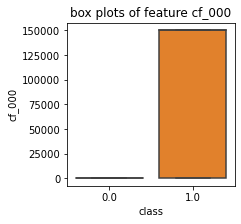

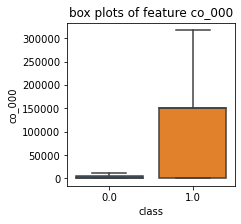

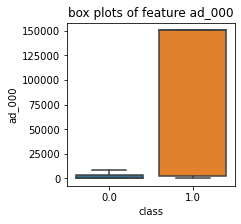

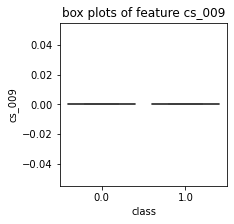

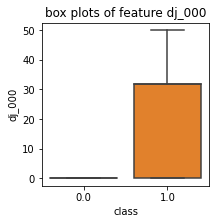

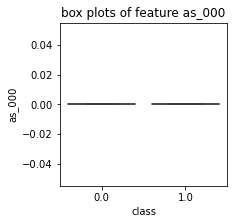

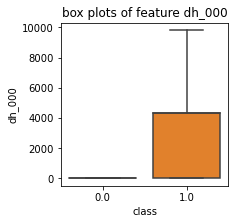

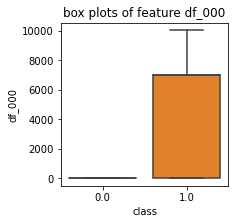

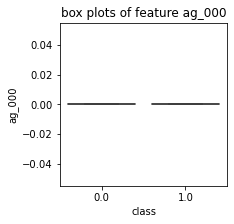

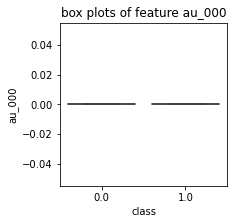

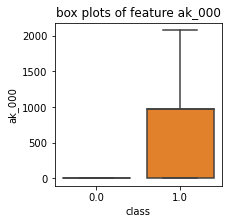

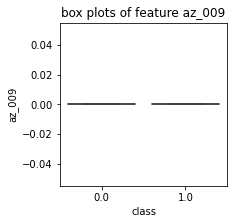

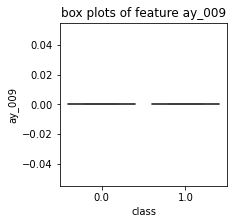

In [28]:
for feature in selected_features:
    plt.figure(figsize=(3,3))
    sns.boxplot(data=complete_set,x='class',y=feature,showfliers=False) # remove outliers
    plt.title('box plots of feature '+feature)
    plt.show()

From the boxplot, we can draw a conclusion that there are some outliers and after removing them, we can notice that the distribution of 
points in positive class is more separated than points in negative class. However, outliers may affect the results. From the scatter plots, 
feature au_000 shows some sense of significance, it may be a good choice combined with other features to perform classification, it is hard 
to draw other conclusions about significance just by the scatter plots, we may need further analysis.

v. Determine the number of positive and negative data. Is this data set imbalanced?

In [32]:
# positive is 1 in the class column, negative is 0 in the class column
train_pos=sum(Y_train)
train_neg=training_set.shape[0]-train_pos
test_pos=sum(Y_test)
test_neg=test_set.shape[0]-test_pos
total_pos=train_pos+test_pos
total_neg=train_neg+test_neg
data0=[[train_pos,train_neg],[test_pos,test_neg],[total_pos,total_neg]]
pos_neg=pd.DataFrame(data=data0,index=['training set','test set','in total'],columns=['positive','negative'])
pos_neg=pos_neg.astype(int)
pos_neg

,positive,negative
training set,1000,59000
test set,375,15625
in total,1375,74625


In [33]:
ratio=train_pos/training_set.shape[0]
print(ratio)

0.016666666666666666


The ratio of positive data in training set is only 1.667%, obviously this data set is severely imbalanced.

(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, 
ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate 
for your random forset and compare it to the test error.

In [35]:
from sklearn.ensemble import RandomForestClassifier

# for training set
rf_model = RandomForestClassifier(n_estimators=100, max_features='sqrt',oob_score=True) # create 100 trees in the forest
rf_model.fit(X_train,Y_train)
train_mis=1-rf_model.score(X_train,Y_train)
oob_err=1-rf_model.oob_score_
print('The misclassification rate for training set is',train_mis)
print('The Out of Bag error estimate of the random forset is',oob_err)

The misclassification rate for training set is 0.0
The Out of Bag error estimate of the random forset is 0.006000000000000005


In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

pred_train=rf_model.predict(X_train)
train_cfm=metrics.confusion_matrix(Y_train, pred_train)
print('The confusion matrix for training set is')
print(train_cfm)

The confusion matrix for training set is
[[59000     0]
 [    0  1000]]


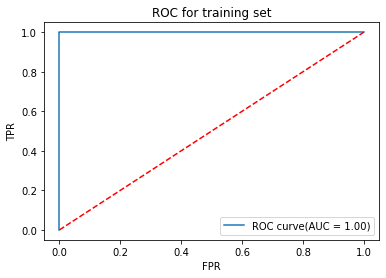

The AUC for the training set is 1.0


In [58]:
prob_train=rf_model.predict_proba(X_train)[:, 1] # we use the predicted probabilities instead of labels to calculate AUC and ROC curve in classification
auc_train = roc_auc_score(Y_train, prob_train)
fpr, tpr, thresholds = roc_curve(Y_train, prob_train)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve(AUC = %0.2f)' % auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for training set')
plt.legend(loc="lower right")
plt.show()

print('The AUC for the training set is',auc_train)

In [51]:
# for test set
test_mis=1-rf_model.score(X_test,Y_test)
print('The misclassification rate for testing set is',test_mis)

The misclassification rate for testing set is 0.007937500000000042


In [52]:
pred_test=rf_model.predict(X_test)
test_cfm=metrics.confusion_matrix(Y_test, pred_test)
print('The confusion matrix for test set is')
print(test_cfm)

The confusion matrix for test set is
[[15607    18]
 [  109   266]]


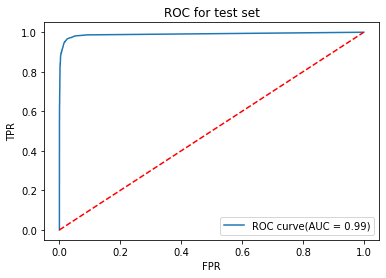

The AUC for the test set is 0.9902685013333334


In [59]:
prob_test=rf_model.predict_proba(X_test)[:, 1] # we use the predicted probabilities instead of labels to calculate AUC and ROC curve in classification
auc_test = roc_auc_score(Y_test, prob_test)
fpr, tpr, thresholds = roc_curve(Y_test, prob_test)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve(AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for test set')
plt.legend(loc="lower right")
plt.show()

print('The AUC for the test set is',auc_test)

We can observe that Out of Bag error estimatation(0.006000000000000005) kind of underestimates the test error(0.007937500000000042), but they 
are similar.

(d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. 
Compare the results with those of 1c.

According to research, there are typically 2 ways to address class imbalance in random forests.
1. Change the sample weights in the dataset. It means set more weights on samples from minority class or penalize severer on misclassification 
of samples from minority class.
2. Change the class weights. It means we change the distribution of samples in training set to make balanced classes. We can set parameter 
'class_weight' to 'balanced' in RandomForestClassifier directly or upsample/subsample during bootstrap training sets.
<br>
<br>Here, I altered the parameter 'class_weight' in RandomForestClassifier.

In [56]:
# for training set
bal_rf_model = RandomForestClassifier(n_estimators=100, max_features='sqrt',oob_score=True,class_weight='balanced') 
bal_rf_model.fit(X_train,Y_train)
train_bal_mis=1-bal_rf_model.score(X_train,Y_train)
bal_oob_err=1-bal_rf_model.oob_score_
print('The balanced misclassification rate for training set is',train_bal_mis)
print('The balanced Out of Bag error estimate of the random forset is',bal_oob_err)

The balanced misclassification rate for training set is 1.666666666666483e-05
The balanced Out of Bag error estimate of the random forset is 0.008016666666666672


In [57]:
bal_pred_train=bal_rf_model.predict(X_train)
bal_train_cfm=metrics.confusion_matrix(Y_train, bal_pred_train)
print('The balanced confusion matrix for training set is')
print(bal_train_cfm)

The balanced confusion matrix for training set is
[[59000     0]
 [    1   999]]


We can notice that after balancing the classes, both the misclassification rate for training set and Out of Bag error estimatation increased, 
but the increase is not obvious. Actually, we can learn from the confusion matrix that only 1 positive sample in the training set was 
misclassified.

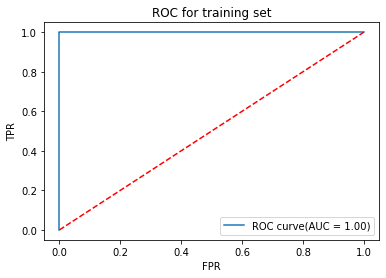

The balanced AUC for the training set is 1.0


In [60]:
bal_prob_train=bal_rf_model.predict_proba(X_train)[:, 1]
bal_auc_train = roc_auc_score(Y_train, bal_prob_train)
fpr, tpr, thresholds = roc_curve(Y_train, bal_prob_train)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve(AUC = %0.2f)' % bal_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for training set')
plt.legend(loc="lower right")
plt.show()

print('The balanced AUC for the training set is',bal_auc_train)

The ROC curve and AUC for training set after balancing remain the same as those of imbalanced data set.

In [61]:
# for test set
test_bal_mis=1-bal_rf_model.score(X_test,Y_test)
print('The balanced misclassification rate for testing set is',test_bal_mis)

The balanced misclassification rate for testing set is 0.010874999999999968


In [63]:
bal_pred_test=bal_rf_model.predict(X_test)
bal_test_cfm=metrics.confusion_matrix(Y_test, bal_pred_test)
print('The balanced confusion matrix for test set is')
print(bal_test_cfm)

The balanced confusion matrix for test set is
[[15614    11]
 [  163   212]]


We can observe from the testing confusion matrix that after balancing, the recall decreased from 266/375=70.9% to 212/375=56.5%, but 
precision increased from 266/(266+18)=93.7% to 212/(212+11)=95.1%. Besides, the misclassification rate for testing set after balancing 
increased slightly.

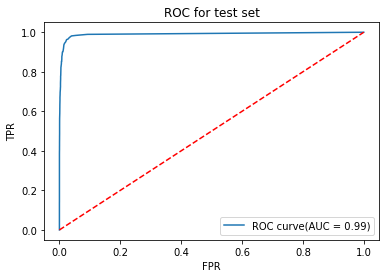

The balanced AUC for the test set is 0.9907047253333333


In [65]:
bal_prob_test=bal_rf_model.predict_proba(X_test)[:, 1]
bal_auc_test = roc_auc_score(Y_test, bal_prob_test)
fpr, tpr, thresholds = roc_curve(Y_test, bal_prob_test)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve(AUC = %0.2f)' % bal_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for test set')
plt.legend(loc="lower right")
plt.show()

print('The balanced AUC for the test set is',bal_auc_test)

In regard to the ROC curve and AUC for test set, there is no obvious differnces between original random forest model and new model trained on 
balanced data. There is a tiny increase in AUC after balancing. And similarly, Out of Bag error estimatation(0.008016666666666672) kind of underestimates the test error(0.010874999999999968), but not too severe.

In general, there is not obvious improvement after balancing the classes, there are only small improvements on precision and auc in test set. 
But the misclassification rate for training set and test set, the Out of Bag error estimatation and recall in test set all decreased in some 
sense.

(e) XGBoost and Model Trees
<br>
<br>In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision 
node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node 
to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used
to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has ∑jβjXj > s. as the decision rule). 
Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to 
determine the value associated with that node.
<br>One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, 
one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) 
using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and 
leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion 
Matrix, ROC, and AUC for training and test sets.

In [11]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

alphas=[1e-3,1e-2,1e-1,1,1e1,1e2,1e3] # increase the alpha exponentially
xgbc = xgb.XGBClassifier(objective='binary:logistic',use_label_encoder=False)
para={'alpha':alphas} # L1-penalized logistic regression at each node
gs = GridSearchCV(xgbc, param_grid=para, n_jobs=-1, cv=5)
gs.fit(X_train,Y_train)
best_alpha=gs.best_params_
best_score=gs.best_score_

print('The chosen alpha by cross-validation is',best_alpha,',the corresponding validation accuracy is',best_score)

The chosen alpha by cross-validation is {'alpha': 0.01} ,the corresponding validation accuracy is 0.9946833333333334


In [22]:
# for training set
best_alpha=0.01
xgb_model=xgb.XGBClassifier(objective='binary:logistic',use_label_encoder=False,reg_alpha=best_alpha)
xgb_model.fit(X_train,Y_train,eval_metric='error',)
train_err=1-xgb_model.score(X_train,Y_train)
print('The XGBoost misclassification rate for training set is',train_err)

The XGBoost misclassification rate for training set is 1.666666666666483e-05


In [23]:
xgb_pred_train=xgb_model.predict(X_train)
xgb_train_cfm=metrics.confusion_matrix(Y_train, xgb_pred_train)
print('The XGBoost confusion matrix for training set is')
print(xgb_train_cfm)

The XGBoost confusion matrix for training set is
[[59000     0]
 [    1   999]]


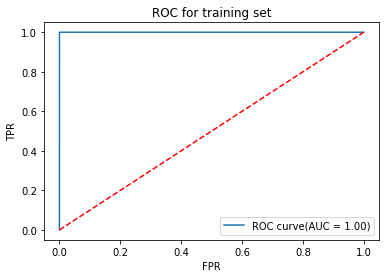

The XGBoost AUC for the training set is 0.9999998474576272


In [26]:
xgb_prob_train=xgb_model.predict_proba(X_train)[:, 1]
xgb_auc_train = roc_auc_score(Y_train, xgb_prob_train)
fpr, tpr, thresholds = roc_curve(Y_train, xgb_prob_train)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve(AUC = %0.2f)' % xgb_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for training set')
plt.legend(loc="lower right")
plt.show()

print('The XGBoost AUC for the training set is',xgb_auc_train)

In [30]:
# for test set
test_err=1-xgb_model.score(X_test,Y_test)
print('The XGBoost misclassification rate for testing set is',test_err)
print('The XGBoost validation error rate is',1-best_score)

The XGBoost misclassification rate for testing set is 0.00593750000000004
The XGBoost validation error rate is 0.005316666666666636


We can observe that the validation error rate is slightly less than the testing error rate, but they are extremely similar, so it is an 
appropriate estimation of test error.

In [28]:
xgb_pred_test=xgb_model.predict(X_test)
xgb_test_cfm=metrics.confusion_matrix(Y_test, xgb_pred_test)
print('The XGBoost confusion matrix for test set is')
print(xgb_test_cfm)

The XGBoost confusion matrix for test set is
[[15611    14]
 [   81   294]]


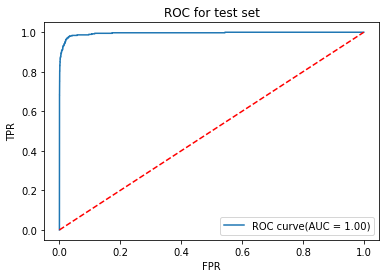

The XGBoost AUC for the test set is 0.9951716693333333


In [31]:
xgb_prob_test=xgb_model.predict_proba(X_test)[:, 1]
xgb_auc_test = roc_auc_score(Y_test, xgb_prob_test)
fpr, tpr, thresholds = roc_curve(Y_test, xgb_prob_test)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve(AUC = %0.2f)' % xgb_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for test set')
plt.legend(loc="lower right")
plt.show()

print('The XGBoost AUC for the test set is',xgb_auc_test)

(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBosst with 
L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong 
way of cross validation here. Compare the uncompensated case with SMOTE case.

In [58]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

alphas=[1e-2,1e-1,1,1e1,1e2] # increase the alpha exponentially
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier',  xgb.XGBClassifier(objective='binary:logistic',use_label_encoder=False)]])
para={'classifier__alpha':alphas} 
bal_gs = GridSearchCV(estimator=pipeline, param_grid=para, n_jobs=-1, cv=5) # include the SMOTE within the cross-validation process
bal_gs.fit(X_train,Y_train)
smote_best_alpha=bal_gs.best_params_
smote_best_score=bal_gs.best_score_

print('After SMOTE, the chosen alpha by cross-validation is',smote_best_alpha,',the corresponding validation accuracy is',smote_best_score)

E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\usc\anaconda\lib\site-packages\imblearn\pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "E:\usc\anaconda\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "E:\usc\anaconda\lib\site-packages\xgboost\sklearn.py", line 1250, in fit
 

[08:21:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
After SMOTE, the chosen alpha by cross-validation is {'classifier__alpha': 0.1} ,the corresponding validation accuracy is 0.9936833333333333


In [65]:
smote_best_alpha=0.1
smo=SMOTE(random_state=42)
x_smo,y_smo=smo.fit_resample(X_train,Y_train) # reconstruct the same smote samples as in cross-validation process

In [67]:
smote_pred_train=bal_gs.predict(x_smo)
smote_train_cfm=metrics.confusion_matrix(y_smo, smote_pred_train)
print('The SMOTE confusion matrix for training set is')
print(smote_train_cfm)

The SMOTE confusion matrix for training set is
[[59000     0]
 [    2 58998]]


In [68]:
# for training set
smote_best_alpha=0.1
smt_model=xgb.XGBClassifier(objective='binary:logistic',use_label_encoder=False,reg_alpha=smote_best_alpha)
smt_model.fit(x_smo,y_smo,eval_metric='error',)
training_err=1-smt_model.score(x_smo,y_smo)
print('The SMOTE XGBoost misclassification rate for training set is',training_err)

The SMOTE XGBoost misclassification rate for training set is 1.694915254235596e-05


In [69]:
smt_pred_train=smt_model.predict(x_smo)
smt_train_cfm=metrics.confusion_matrix(y_smo, smt_pred_train)
print('The SMOTE XGBoost confusion matrix for training set is')
print(smt_train_cfm)

The SMOTE XGBoost confusion matrix for training set is
[[59000     0]
 [    2 58998]]


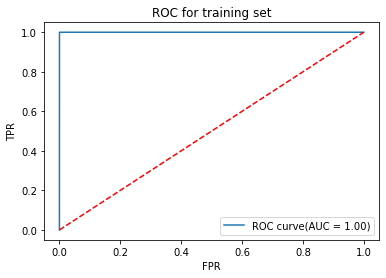

The SMOTE XGBoost AUC for the training set is 0.9999999968399885


In [70]:
smt_prob_train=smt_model.predict_proba(x_smo)[:, 1]
smt_auc_train = roc_auc_score(y_smo, smt_prob_train)
fpr, tpr, thresholds = roc_curve(y_smo, smt_prob_train)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve(AUC = %0.2f)' % smt_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for training set')
plt.legend(loc="lower right")
plt.show()

print('The SMOTE XGBoost AUC for the training set is',smt_auc_train)

In [71]:
# for test set
testing_err=1-smt_model.score(X_test,Y_test) # keep the test set invariant without smote
print('The SMOTE XGBoost misclassification rate for testing set is',testing_err)
print('The SMOTE XGBoost validation error rate is',1-smote_best_score)

The SMOTE XGBoost misclassification rate for testing set is 0.0075625000000000275
The SMOTE XGBoost validation error rate is 0.006316666666666748


We can notice that the validation error rate is slightly smaller than the testing error rate here, but they are kind of similar, so it is an 
appropriate estimation of test error.

In [72]:
smt_pred_test=smt_model.predict(X_test)
smt_test_cfm=metrics.confusion_matrix(Y_test, smt_pred_test)
print('The SMOTE XGBoost confusion matrix for test set is')
print(smt_test_cfm)

The SMOTE XGBoost confusion matrix for test set is
[[15577    48]
 [   73   302]]


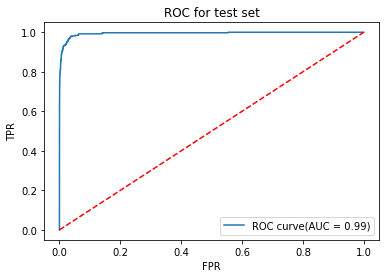

The SMOTE XGBoost AUC for the test set is 0.9946924373333332


In [73]:
smt_prob_test=smt_model.predict_proba(X_test)[:, 1]
smt_auc_test = roc_auc_score(Y_test, smt_prob_test)
fpr, tpr, thresholds = roc_curve(Y_test, smt_prob_test)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve(AUC = %0.2f)' % smt_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for test set')
plt.legend(loc="lower right")
plt.show()

print('The SMOTE XGBoost AUC for the test set is',smt_auc_test)

In [75]:
comparedata=[[best_alpha,smote_best_alpha],[train_err,training_err],[xgb_auc_train,smt_auc_train],[1-best_score,1-smote_best_score],[test_err,testing_err],[294/(294+14),302/(302+48)],[294/375,302/375],[xgb_auc_test,smt_auc_test]]
compare=pd.DataFrame(data=comparedata,index=['best_alpha','training error','training auc','validation error','testing error','testing precision','testing recall','testing auc'],columns=['uncompensated case','SMOTE case'])
compare

,uncompensated case,SMOTE case
best_alpha,0.010000,0.100000
training error,0.000017,0.000017
training auc,1.000000,1.000000
validation error,0.005317,0.006317
testing error,0.005938,0.007563
testing precision,0.954545,0.862857
testing recall,0.784000,0.805333
testing auc,0.995172,0.994692


According to the comparison, after SMOTE to compensate for class imbalance, the validation error rate and testing error rate increased 
slightly and the testing auc suffered a tiny decrease. Based on the confusion matrix, the testing precision decreased and the testing recall 
increased after SMOTE.

2. ISLR 6.6.3
<br>3. Suppose we estimate the regression coefficients in a linear regression model by minimizing
<br>n ∑ i=1(yi−β0−p∑ j=1βjxij)^2 subject to p∑ j=1|βj| ≤ s 
<br>for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.
<br>(a) As we increase s from 0, the training RSS will:
<br>i. Increase initially, and then eventually start decreasing in an inverted U shape.
<br>ii. Decrease initially, and then eventually start increasing in a U shape.
<br>iii. Steadily increase.
<br>iv. Steadily decrease.
<br>v. Remain constant.
<br>(b) Repeat (a) for test RSS.
<br>(c) Repeat (a) for variance.
<br>(d) Repeat (a) for (squared) bias.
<br>(e) Repeat (a) for the irreducible error.

(a) iv. is correct. As s increases from 0, the constrained condition becomes less and less strict, the model will become more flexible and 
the betas will increase, the training RSS will steadily decrease to ordinary least square RSS.
<br>
<br>
(b) ii. is correct. When s is 0, the null model suffers underfitting with a high test RSS. As s increases, betas will increase and the model 
starts to fit well on training and test data, the test RSS will decrease. But eventually, the constraint becomes invalid and the model starts 
to overfit the training data and the test RSS start increasing in a U shape.
<br>
<br>
(c) iii. is correct. When s is 0, the null model return an average with almost no variance. As s increases, the model will become more and 
more flexible which results in steadily increase in variance, and the betas become highly dependent on the training set.
<br>
<br>
(d) iv. is correct. As s increases from 0, the model will become more and more flexible and fit better on training data, the prediction will 
be closer to the actual response, the (squared) bias will steadily decrease, overfitting will happen as well.
<br>
<br>
(e) v. is correct. The irreducible error is related to ε. It is independent of the model. It will remain constant no matter how well we fit 
the model or what the choice of s is.

3. ISLR, 6.6.5
<br>5. It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting.
Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore, suppose that y1+y2 = 0 and x11+x21 = 0 and x12+x22 = 0, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: ˆ β0 = 0.
<br>(a) Write out the ridge regression optimization problem in this setting.
<br>(b) Argue that in this setting, the ridge coefficient estimates satisfy ˆ β1 = ˆ β2.
<br>(c) Write out the lasso optimization problem in this setting.
<br>(d) Argue that in this setting, the lasso coefficients ˆ β1 and ˆ β2 are not unique—in other words, there are many possible solutions
to the optimization problem in (c). Describe these solutions.

Answers for this question are in the pdf attached with this homework.

4. ISLR 8.4.5
<br>5. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree
to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):
<br>0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.
<br>There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed 
in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under 
each of these two approaches?

In [76]:
prob_list=[0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75]
vote_red=0
vote_green=0
for p in prob_list:
    if p>0.5:
        vote_red+=1
    else:
        vote_green+=1
print('Vote for Red is',vote_red)
print('Vote for Green is',vote_green)

Vote for Red is 6
Vote for Green is 4


We can see that there are 6 Red predictions and 4 Green predictions within these 10 bootstrapped samples. According to the majority vote 
approach, the final classification is Red.

In [77]:
avg_prob=sum(prob_list)/len(prob_list)
print('The average probability of P(Class is Red|X) is',avg_prob)

The average probability of P(Class is Red|X) is 0.45


We can see that the average probability of P(Class is Red|X) is 0.45, which is smaller than threshold 0.5. Based on the average probability 
approach, the final classification is Green.

5. ISLR 9.7.3
<br>3. Here we explore the maximal margin classifier on a toy data set.

(a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.
<br>Obs. X1 X2 &ensp;&nbsp; Y
<br>1 &nbsp; &emsp; 3 &ensp; 4 &ensp; Red
<br>2 &nbsp; &emsp; 2 &ensp; 2 &ensp; Red
<br>3 &nbsp; &emsp; 4 &ensp; 4 &ensp; Red
<br>4 &nbsp; &emsp; 1 &ensp; 4 &ensp; Red
<br>5 &nbsp; &emsp; 2 &ensp; 1 &ensp; Blue
<br>6 &nbsp; &emsp; 4 &ensp; 3 &ensp; Blue
<br>7 &nbsp; &emsp; 4 &ensp; 1 &ensp; Blue
<br>Sketch the observations.

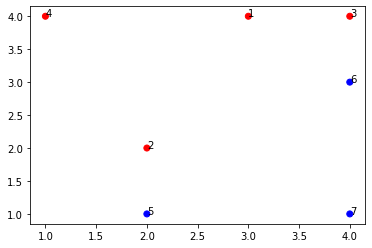

In [82]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
Y = ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']
plt.figure()
plt.scatter(x1, x2, c=Y)
for i in range(7):
    plt.annotate(i+1,(x1[i],x2[i]))
plt.show()

(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).

According to the scatter plot, we can know that the optimal separating hyperplane should pass through the midpoint of point2 and point5, 
which is (2,1.5) and the midpoint of point3 and point6, which is (4,3.5). Through computation, the  equation for this hyperplane is 
0.5-x1+x2=0.

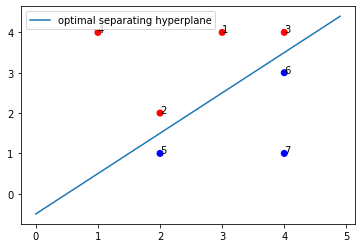

In [84]:
plt.figure()
plt.scatter(x1, x2, c=Y)
for i in range(7):
    plt.annotate(i+1,(x1[i],x2[i]))
x = np.arange(0, 5, 0.1)
y=x-0.5
plt.plot(x,y)
plt.legend(['optimal separating hyperplane'])
plt.show()

(c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if
β0 +β1X1 +β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

Classify to Red if 0.5-x1+x2 > 0, classify to Blue otherwise (if 0.5-x1+x2 <= 0).

(d) On your sketch, indicate the margin for the maximal margin hyperplane.

The upper margin should pass the point2 and point3, and the lower margin should pass the point5 and point6.

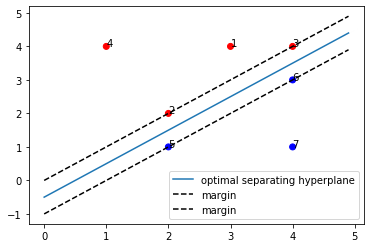

In [91]:
plt.figure()
plt.scatter(x1, x2, c=Y)
for i in range(7):
    plt.annotate(i+1,(x1[i],x2[i]))
x = np.arange(0, 5, 0.1)
y=x-0.5
plt.plot(x,y)
y1=x
plt.plot(x,y1,'black',linestyle='dashed')
y2=x-1
plt.plot(x,y2,'black',linestyle='dashed')
plt.legend(['optimal separating hyperplane','margin','margin'])
plt.show()

(e) Indicate the support vectors for the maximal margin classifier.

The support vectors are point2 (2,2), point3 (4,4), point5 (2,1) and point6 (4,3).

(f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

A slight movement of point7 (4,1) would not affect the maximal margin hyperplane, because point7 lies outside of the margin both before and 
after the slight movement, the margin and hyperplane are still determined by ponit2, point3, point5 and point6 as shown in the plot.

(g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

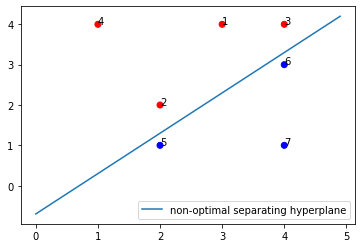

In [92]:
plt.figure()
plt.scatter(x1, x2, c=Y)
for i in range(7):
    plt.annotate(i+1,(x1[i],x2[i]))
x = np.arange(0, 5, 0.1)
y=x-0.7
plt.plot(x,y)
plt.legend(['non-optimal separating hyperplane'])
plt.show()

The equation for this non-optimal hyperplane is 0.7-x1+x2=0.

(h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

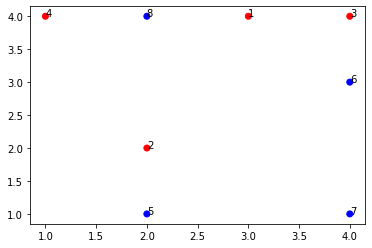

In [93]:
# add point8 (2,4) with Y:Blue
x1 = [3, 2, 4, 1, 2, 4, 4, 2]
x2 = [4, 2, 4, 4, 1, 3, 1, 4]
Y = ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue']
plt.figure()
plt.scatter(x1, x2, c=Y)
for i in range(8):
    plt.annotate(i+1,(x1[i],x2[i]))
plt.show()

Obviously, the two classes are not separable by a hyperplane now.